In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
path = "/content/drive/MyDrive/CIR/data/"

batch_size = 10
img_height = 64
img_width = 64
validation_split = 0.2

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=validation_split,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=validation_split,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_dataset.class_names
print(class_names)

Found 1203 files belonging to 2 classes.
Using 963 files for training.
Found 1203 files belonging to 2 classes.
Using 240 files for validation.
['non_smile', 'smile']


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
# Training loop
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20
)

# Print history (optional)
print(history.history)

Epoch 1/20
97/97 [==============================] - 98s 868ms/step - loss: 1.1855 - accuracy: 0.7196 - val_loss: 0.2344 - val_accuracy: 0.8917
Epoch 2/20
97/97 [==============================] - 8s 84ms/step - loss: 0.2479 - accuracy: 0.9232 - val_loss: 0.2569 - val_accuracy: 0.9000
Epoch 3/20
97/97 [==============================] - 6s 60ms/step - loss: 0.1675 - accuracy: 0.9439 - val_loss: 0.1253 - val_accuracy: 0.9542
Epoch 4/20
97/97 [==============================] - 6s 58ms/step - loss: 0.1106 - accuracy: 0.9647 - val_loss: 0.1142 - val_accuracy: 0.9417
Epoch 5/20
97/97 [==============================] - 9s 91ms/step - loss: 0.0989 - accuracy: 0.9678 - val_loss: 0.1289 - val_accuracy: 0.9542
Epoch 6/20
97/97 [==============================] - 5s 49ms/step - loss: 0.0877 - accuracy: 0.9740 - val_loss: 0.2084 - val_accuracy: 0.9250
Epoch 7/20
97/97 [==============================] - 7s 72ms/step - loss: 0.0519 - accuracy: 0.9865 - val_loss: 0.1082 - val_accuracy: 0.9458
Epoch 8/20


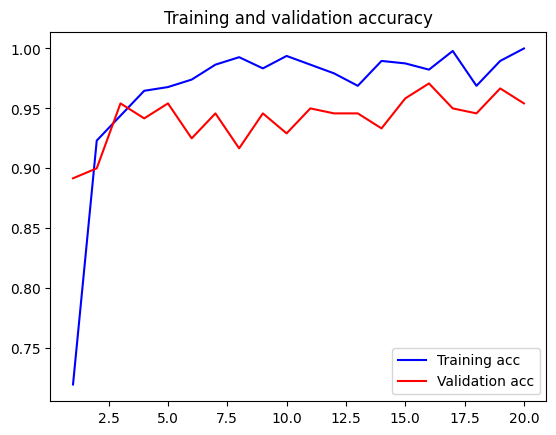

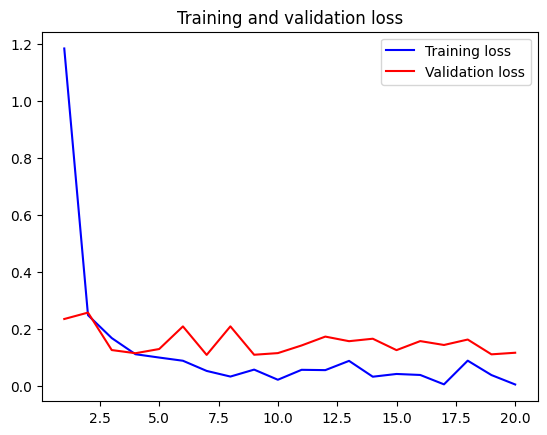

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
model.save("/content/drive/MyDrive/CIR/initial_model.keras")
model.save("/content/drive/MyDrive/CIR/initial_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
test_path = "/content/drive/MyDrive/CIR/data"

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    validation_split=0.5,  # Set to any value, as test set doesn't need to be large
    subset="validation",   # Create a test dataset
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

pred = model.predict(
    test_dataset
)

print(pred)

Found 1203 files belonging to 2 classes.
Using 601 files for validation.
61/61 [==============================] - 3s 30ms/step
[[-24.759493    15.856832  ]
 [  5.5094304   -9.813275  ]
 [ -9.472905     3.4665284 ]
 ...
 [ -6.2326684    0.49031714]
 [-13.177226     6.370776  ]
 [  5.273868    -9.709037  ]]


In [11]:
classes = ["non_smile", "smile"]
working_dir=r'./'

test_dir=r"/content/drive/MyDrive/CIR/x"
bs=100
filepaths=[]
flist=sorted(os.listdir(test_dir))
for f in flist:
    fpath=os.path.join(test_dir,f)
    filepaths.append(fpath)
Fseries=pd.Series(filepaths, name='filepaths')
test_df=pd.concat([Fseries], axis=1)
gen=ImageDataGenerator()
test_gen=gen.flow_from_dataframe(test_df, x_col='filepaths', y_col=None, class_mode=None, target_size=(64, 64),
                                color_mode='rgb', shuffle=False, batch_size=bs)
preds=model.predict(test_gen, verbose=1)
pred_class=[]
files=[]
for i, p in enumerate(preds):
    index=np.argmax(p)
    pred_class.append(classes[index])
    file=test_gen.filenames[i].split('/')[6]
    files.append(file)
Fseries=pd.Series(files, name='File Name')
Cseries=pd.Series(pred_class, name='Predicted Class')
predictions_df=pd.concat([Fseries, Cseries], axis=1)
csv_path=os.path.join(working_dir, 'predictions.csv')
predictions_df.to_csv(csv_path, index=False)
# read in csv to make sure it is correct
df=pd.read_csv(csv_path)
print (df.head(20))

Found 4 validated image filenames.
1/1 [==============================] - 0s 129ms/step
  File Name Predicted Class
0       CIR           smile
1       CIR           smile
2       CIR       non_smile
3       CIR       non_smile
